In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("eval_ckpt200.csv")
display(df)

#read
obs_columns = [f'obs{i}' for i in range(15)]
obs_array = df[obs_columns].to_numpy()

obs_array = np.repeat(obs_array, repeats=3, axis=1) #repeat 3 times to simulate hisotry 3
obs_array.shape

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14
0,0,-5.607039e-13,-1.035936e-11,0.079485,-0.329381,0.638058,0.109683,4.483758,-4.792757e-10,-1.963810e-09,...,4.149016e-09,1.337705e-09,1.777128e-08,2.641428e-09,-0.973978,-0.226644,-0.541211,-0.840887,-0.894049,-0.447969
1,1,-1.259991e-04,1.916388e-05,0.078125,-0.327490,0.631546,0.110093,4.463390,-1.970821e-02,3.046784e-03,...,1.070998e-02,-4.367840e-02,2.011830e-02,-8.577923e-02,-0.969160,-0.246434,-0.541211,-0.840887,-0.896546,-0.442951
2,2,-4.478701e-04,7.140623e-05,0.076015,-0.322317,0.614310,0.111104,4.409286,-3.864120e-02,6.562378e-03,...,2.445859e-02,-9.036833e-02,4.114109e-02,-1.781401e-01,-0.954415,-0.298483,-0.541211,-0.840887,-0.902990,-0.429661
3,3,-9.477331e-04,1.984646e-04,0.073832,-0.315588,0.586648,0.115095,4.304210,-3.016464e-02,2.744370e-02,...,-5.850296e-02,-5.620069e-02,9.255809e-02,-3.767819e-01,-0.917845,-0.396938,-0.541211,-0.840887,-0.913056,-0.407835
4,4,-1.161902e-03,5.361618e-04,0.074257,-0.324333,0.574543,0.132153,4.141904,-1.158122e-02,3.766282e-02,...,-7.456207e-02,-4.136740e-02,1.033235e-01,-4.592292e-01,-0.841639,-0.540040,-0.541211,-0.840887,-0.918468,-0.395495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,-4.738833e+00,-2.142033e+00,0.075773,1.924948,-0.735708,-1.834786,54.039841,-3.773162e-05,-4.398088e-03,...,-1.217760e-02,-2.478331e-03,-8.225108e-03,-1.541857e-02,-0.591377,-0.806395,-0.612764,0.790266,0.157873,-0.987459
1996,1996,-4.738813e+00,-2.142064e+00,0.075601,1.925380,-0.734368,-1.835587,54.035873,-6.658237e-04,1.393598e-03,...,-2.956807e-03,-2.417440e-04,5.571350e-04,-1.409106e-02,-0.588173,-0.808735,-0.612764,0.790266,0.157613,-0.987501
1997,1997,-4.738820e+00,-2.142044e+00,0.075627,1.925231,-0.734327,-1.835431,54.030281,-5.965846e-04,1.693528e-03,...,1.616028e-04,-4.547307e-04,2.013900e-03,-1.436440e-02,-0.583641,-0.812012,-0.612764,0.790266,0.157560,-0.987509
1998,1998,-4.738821e+00,-2.142035e+00,0.075630,1.925144,-0.734286,-1.835333,54.025101,-4.367448e-04,-4.270225e-04,...,-6.531378e-04,2.557757e-04,3.508326e-04,-1.350512e-02,-0.579427,-0.815024,-0.612764,0.790266,0.157530,-0.987514


(2000, 45)

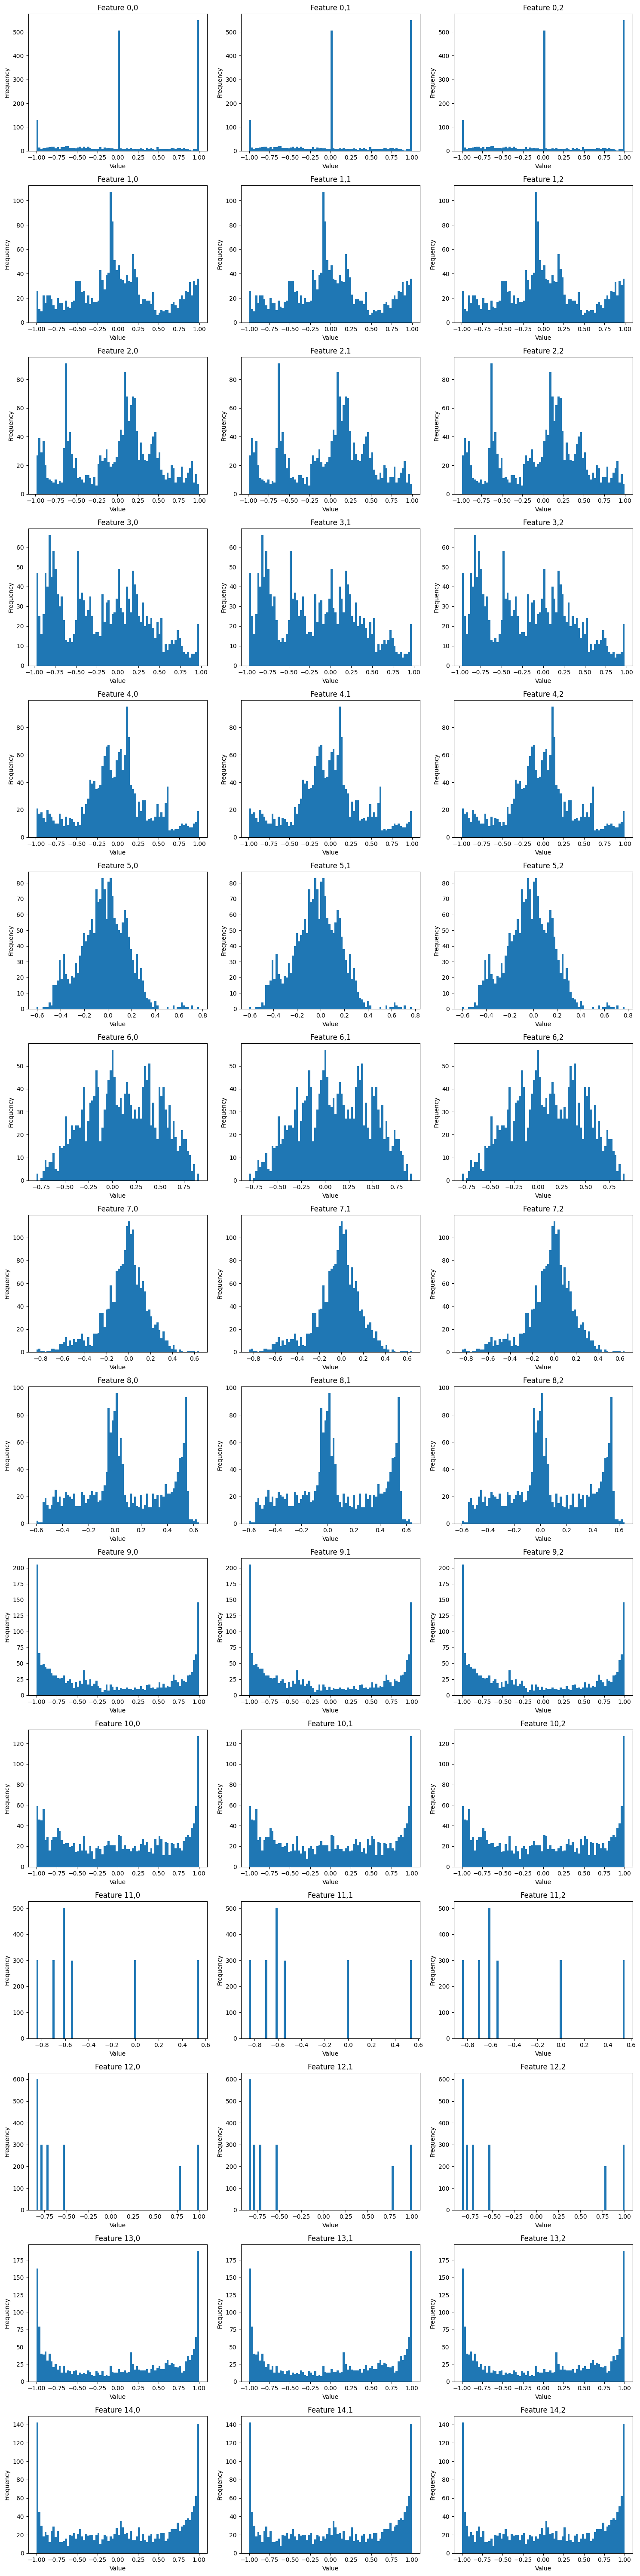

In [2]:

num_features = obs_array.shape[1]
num_rows = (num_features + 2) // 3  # Calculate rows needed, rounding up
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    ax = axes[i]
    ax.hist(obs_array[:,i], bins=80)
    ax.set_title(f'Feature {i//3},{i%3}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for i in range(num_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

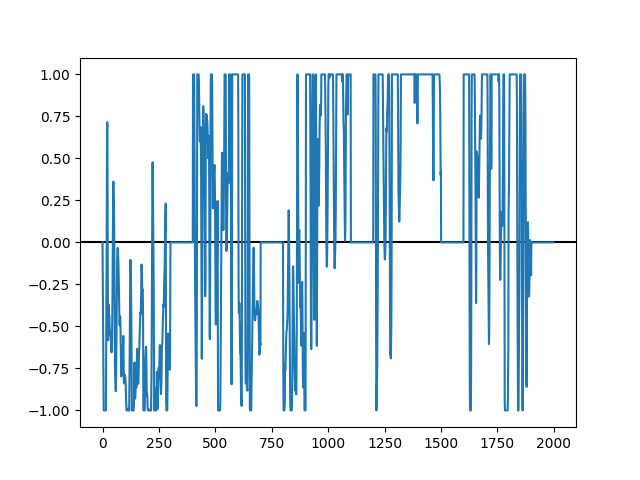

In [3]:
%matplotlib widget
plt.figure()
plt.axhline(0, color='black')
plt.plot(obs_array[:,0])

Text(0.5, 0, 'Time (s)')

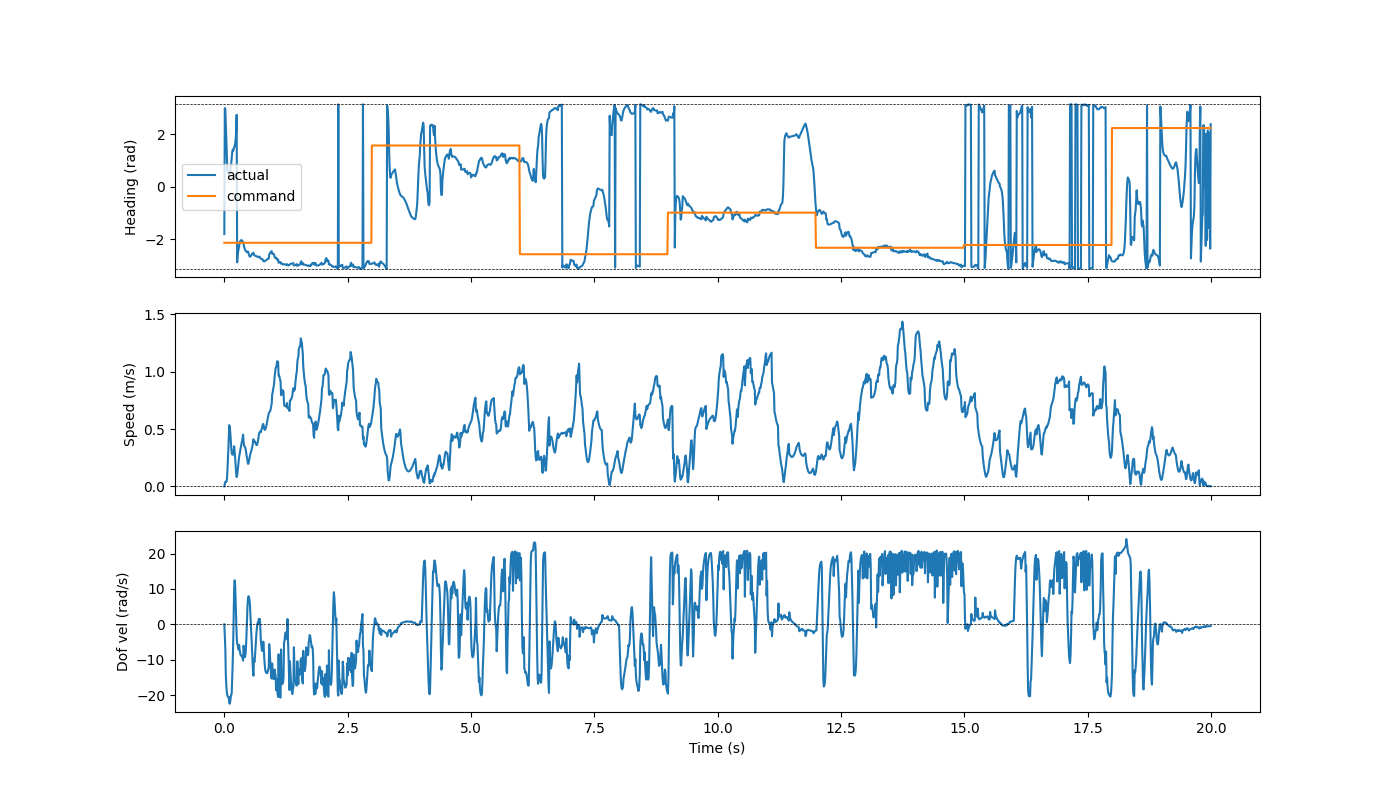

In [7]:
heading = np.arctan2(df['vel1'], df['vel0'])
speed = np.linalg.norm(df[['vel0', 'vel1']], axis=1)
# heading

des_heading = np.arctan2(df['obs12'], df['obs11'])
fig, axs = plt.subplots(3,1, sharex=True, figsize=(14,8))
axs[0].plot(np.arange(len(df))*0.01, heading, label='actual')
axs[0].plot(np.arange(len(df))*0.01, des_heading, label='command')
axs[0].axhline(-np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].axhline(np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].set_ylabel('Heading (rad)')
axs[0].legend()


axs[1].plot(np.arange(len(df))*0.01, speed)
axs[1].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[1].set_ylabel('Speed (m/s)')


action_filtered = np.zeros(len(df))
alpha = 0.6
for i in range(1, len(df)):
    action_filtered[i] = action_filtered[i-1]*alpha + df['action'][i]*(1-alpha)

axs[2].plot(np.arange(len(df))*0.01, df['obs8']*37.5)
# axs[2].plot(np.arange(len(df))*0.01, df['action'])
# axs[2].plot(np.arange(len(df))*0.01, action_filtered)
axs[2].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[2].set_ylabel('Dof vel (rad/s)')


axs[-1].set_xlabel('Time (s)')